# 1. Environment Setting

In [1]:
import pandas as pd
import networkx as nx

# 2. Load Dataset

In [2]:
# load dataset
wine = pd.read_csv('./wine_info_gm.csv')
user = pd.read_csv('./user_info_gm.csv')
review = pd.read_csv('./review_gm.csv')

In [3]:
'''
     [Wine Table : wine information]
     
1. wid : wine_id
2. name : wine_name
3. vintage : wine_vintage
4. winery : winery_name
5. avg_ratings : 해당 와인에 대한 평균 평점
6. num_ratings : 해당 와인에 대한 리뷰 개수
7. foods : 해당 와인과 잘 어울리는 음식

'''
wine

,wid,name,vintage,winery,avg_ratings,num_ratings,price,foods
0,w0,Clos d'Ambonnay Blanc de Noirs Brut Champagne,1995,Krug,4.9,135,"$7,500","Pork, Rich fish (salmon, tuna etc), Shellfish,..."
1,w1,The Beast Cabernet Sauvignon,2017,Del Dotto,4.9,61,$525.76,"Beef, Lamb, Game (deer, venison), Mature and h..."
2,w2,Château Margaux (Premier Grand Cru Classé),2018,Château Margaux,4.9,35,"$1,695","Beef, Lamb, Game (deer, venison), Poultry"
3,w3,Vintage Port Nacional,1994,Quinta do Noval,4.9,34,"$2,200","Beef, Mature and hard cheese"
4,w4,Grand Vin Pauillac (Premier Grand Cru Classé),1990,Château Latour,4.8,1506,"$1,695","Beef, Lamb, Game (deer, venison), Poultry"
...,...,...,...,...,...,...,...,...
3406,w3406,Saint-Émilion Grand Cru (Premier Grand Cru Cla...,2015,Château Pavie,4.8,96,"€424,46","Beef, Lamb, Game (deer, venison), Poultry"
3407,w3407,Vecina,2013,Bond,4.8,95,€750,"Beef, Lamb, Game (deer, venison), Poultry"
3408,w3408,Montrachet Grand Cru Marquis de Laguiche,2017,Joseph Drouhin,4.8,93,€645,"Pasta, Rich fish (salmon, tuna etc), Shellfish..."
3409,w3409,Don PX Pedro Ximenez,1946,Toro Albalá,4.8,89,"€26,78","Sweet desserts, Blue cheese"


In [4]:
'''
     [User Table : user information]
     
1. uid : user_id
2. name : user_name
3. country : user_country
4. ratings : 해당 유저가 별점을 매긴 리뷰 수 
5. follwer : 해당 유저를 팔로우 하는 사람의 수 
6. following : 해당 유저가 팔로잉 하는 사람의 수 

'''
user

,uid,name,country,ratings,follower,following
0,u0,Oli G.,Italy,9385,3944,760
1,u1,Massimo Trussardi,Italy,9490,5902,421
2,u2,Claus,Italy,7104,3474,5000
3,u3,Titti,Italy,6591,6544,1155
4,u4,Enrico G,Italy,4752,4936,362
...,...,...,...,...,...,...
2975,u2975,Sarah Vital,France,297,14,12
2976,u2976,Hugues M,France,262,60,143
2977,u2977,Λανκελοτ Μυνιχ,France,244,41,45
2978,u2978,Sarto,France,272,77,177


In [5]:
'''
     [Review Table : wine에 대한 user의 리뷰]
     
1. uid : user_id
2. wid : wine_id
3. name : user_name
4. wine_name : wine_name
5. wine_vintage : wine_vintage
6. rating : 해당 유저가 와인에 대해 매긴 별점

'''
review

,uid,wid,name,wine_name,wine_vintage,rating
0,u0,w1293,Oli G.,Bricco dell'Uccellone Barbera d'Asti,2017,4.0
1,u0,w1072,Oli G.,Sauvignon Blanc,2018,4.0
2,u0,w1283,Oli G.,Sauvignon Blanc,2020,4.0
3,u0,w997,Oli G.,Amarone della Valpolicella,2016,4.0
4,u0,w3337,Oli G.,Barolo,2017,3.0
...,...,...,...,...,...,...
15481,u2726,w2203,Robin Berner,Chardonnay,2017,4.0
15482,u2726,w3385,Robin Berner,Cabernet Sauvignon,2015,3.0
15483,u2726,w2392,Robin Berner,Cabernet Franc,2012,3.0
15484,u2728,w3357,Luisa N,Cabernet Sauvignon,2018,4.0


# Preprocessing 

In [11]:
len(review[review.duplicated(subset=['uid','wid'])])

2296

In [12]:
review.drop_duplicates(subset=['uid','wid'], keep='last', inplace=True)
review

,uid,wid,name,wine_name,wine_vintage,rating
0,u0,w1293,Oli G.,Bricco dell'Uccellone Barbera d'Asti,2017,4.0
1,u0,w1072,Oli G.,Sauvignon Blanc,2018,4.0
2,u0,w1283,Oli G.,Sauvignon Blanc,2020,4.0
3,u0,w997,Oli G.,Amarone della Valpolicella,2016,4.0
4,u0,w3337,Oli G.,Barolo,2017,3.0
...,...,...,...,...,...,...
15481,u2726,w2203,Robin Berner,Chardonnay,2017,4.0
15482,u2726,w3385,Robin Berner,Cabernet Sauvignon,2015,3.0
15483,u2726,w2392,Robin Berner,Cabernet Franc,2012,3.0
15484,u2728,w3357,Luisa N,Cabernet Sauvignon,2018,4.0


In [13]:
# reset index
review.reset_index(drop=True, inplace=True)

In [14]:
# Wine count : 리뷰에 언급된 와인 수 확인
wine_cnt = review['wid'].value_counts()
wine_cnt

w1283    722
w2347    592
w1245    287
w3357    235
w1072    218
        ... 
w3252      1
w1347      1
w77        1
w128       1
w3008      1
Name: wid, Length: 1566, dtype: int64

In [16]:
# 20번 이상의 리뷰를 받은 와인만 골랐을 때, 112개의 와인이 선택됨.
sum(list(wine_cnt >= 20))

112

In [22]:
# --- your code --- # 
target_wid = list(wine_cnt[list(wine_cnt>=20)].keys())
# ------- print ------- #
target_wid

['w1283',
 'w2347',
 'w1245',
 'w3357',
 'w1072',
 'w1813',
 'w2417',
 'w2203',
 'w3405',
 'w2917',
 'w2337',
 'w2289',
 'w3389',
 'w1028',
 'w1638',
 'w444',
 'w997',
 'w274',
 'w3347',
 'w1436',
 'w937',
 'w885',
 'w1354',
 'w3302',
 'w1725',
 'w1627',
 'w3109',
 'w3385',
 'w1295',
 'w2290',
 'w2585',
 'w1958',
 'w3337',
 'w3342',
 'w3188',
 'w2097',
 'w2586',
 'w1921',
 'w2294',
 'w2343',
 'w2929',
 'w642',
 'w3184',
 'w3301',
 'w2194',
 'w3234',
 'w3391',
 'w1947',
 'w1934',
 'w1508',
 'w2815',
 'w2776',
 'w2727',
 'w2887',
 'w1252',
 'w3195',
 'w2297',
 'w2794',
 'w3165',
 'w282',
 'w2484',
 'w1271',
 'w3336',
 'w3241',
 'w2966',
 'w10',
 'w2688',
 'w3382',
 'w3191',
 'w2973',
 'w1254',
 'w2600',
 'w2165',
 'w1488',
 'w607',
 'w2164',
 'w2178',
 'w2434',
 'w1378',
 'w3007',
 'w3221',
 'w2252',
 'w1841',
 'w2681',
 'w1932',
 'w3273',
 'w2437',
 'w2902',
 'w285',
 'w971',
 'w2841',
 'w1256',
 'w1939',
 'w3239',
 'w2231',
 'w9',
 'w2813',
 'w3041',
 'w2993',
 'w1301',
 'w3099',
 'w64

In [23]:
# Result Check: 결과로 112개가 출력되어야 함.
print(len(target_wid))

112


In [34]:
# ----- your code ----- # 
f_review = review[[i in target_wid for i in review['wid']]]
# ------- print ------- # 
f_review

,uid,wid,name,wine_name,wine_vintage,rating
1,u0,w1072,Oli G.,Sauvignon Blanc,2018,4.0
2,u0,w1283,Oli G.,Sauvignon Blanc,2020,4.0
3,u0,w997,Oli G.,Amarone della Valpolicella,2016,4.0
4,u0,w3337,Oli G.,Barolo,2017,3.0
7,u1,w997,Massimo Trussardi,Amarone della Valpolicella,2016,3.0
...,...,...,...,...,...,...
13184,u2725,w1072,Oliver Sippel,Sauvignon Blanc,2018,3.0
13185,u2726,w2203,Robin Berner,Chardonnay,2017,4.0
13186,u2726,w3385,Robin Berner,Cabernet Sauvignon,2015,3.0
13188,u2728,w3357,Luisa N,Cabernet Sauvignon,2018,4.0


In [35]:
# target wid 
wid_list = list(set(f_review['wid'])) # same target_wid

In [38]:
# ----- your code ----- # 
f_wine = wine[[i in wid_list for i in wine['wid']]]
# ------- print ------- # 
f_wine

,wid,name,vintage,winery,avg_ratings,num_ratings,price,foods
9,w9,Sauternes,2015,Château d'Yquem,4.8,567,"$1,384.60","Fruity desserts, Blue cheese"
10,w10,Sauternes,2016,Château d'Yquem,4.8,534,"$1,384.60","Fruity desserts, Blue cheese"
274,w274,Shiraz,2019,The Standish,4.7,27,$115,"Beef, Lamb, Game (deer, venison), Poultry"
282,w282,Tignanello,2016,Antinori,4.6,11270,$120,"Beef, Lamb, Veal, Poultry, Cured Meat"
285,w285,Initial Blanc de Blancs Brut Champagne Grand C...,N.V.,Jacques Selosse,4.6,5939,$589,"Pork, Rich fish (salmon, tuna etc), Shellfish,..."
...,...,...,...,...,...,...,...,...
3382,w3382,Cabernet Sauvignon,2012,Screaming Eagle,4.8,224,€5.125,"Beef, Lamb, Game (deer, venison), Mature and h..."
3385,w3385,Cabernet Sauvignon,2015,Scarecrow,4.8,209,"€848,21","Beef, Lamb, Game (deer, venison), Mature and h..."
3389,w3389,Cabernet Sauvignon,2016,Scarecrow,4.8,162,"€2.734,60","Beef, Lamb, Game (deer, venison), Mature and h..."
3391,w3391,Saint-Émilion Grand Cru,2014,Château Tertre Roteboeuf,4.8,155,€295,"Beef, Lamb, Game (deer, venison), Poultry"


In [39]:
# target uid 
uid_list = list(set(f_review['uid']))

In [40]:
# ----- your code ----- #  
f_user = user[[i in uid_list for i in user['uid']]]
# ------- print ------- # 
f_user

,uid,name,country,ratings,follower,following
0,u0,Oli G.,Italy,9385,3944,760
1,u1,Massimo Trussardi,Italy,9490,5902,421
4,u4,Enrico G,Italy,4752,4936,362
5,u5,Arcadio,Italy,2251,692,96
13,u13,Pier Ferrari,Italy,1312,1524,1280
...,...,...,...,...,...,...
2975,u2975,Sarah Vital,France,297,14,12
2976,u2976,Hugues M,France,262,60,143
2977,u2977,Λανκελοτ Μυνιχ,France,244,41,45
2978,u2978,Sarto,France,272,77,177


In [41]:
# Create Undirected Graph 
G = nx.Graph() 

In [54]:
# ---- your code ----- # 
wine_node = []
for w, ar, nr, p, f, wy in zip(f_wine['wid'], f_wine['avg_ratings'], f_wine['num_ratings'], f_wine['price'], f_wine['foods'], f_wine['winery']):
  wine_node.append((w, {"avg_ratings":ar, "num_ratings":nr, "price":p, "foods":f, "winery":wy, "node_type":'wine'}))
G.add_nodes_from(wine_node)

In [55]:
# Check
for node in G.nodes(data=True):
  print(node)
  break

('w9', {'avg_ratings': 4.8, 'num_ratings': 567, 'price': '$1,384.60', 'foods': 'Fruity desserts, Blue cheese', 'winery': "Château d'Yquem", 'node_type': 'wine'})


In [56]:
# ---- your code ----- # 
user_node = []
for u, c, r, fr, fi in zip(f_user['uid'], f_user['country'], f_user['ratings'], f_user['follower'], f_user['following']):
  user_node.append((u, {"country":c, "ratings":r, "follower":fr, "following":fi, "node_type":'user'}))
G.add_nodes_from(user_node)

In [64]:
# Check
for node in G.nodes(data=True):
  if node[0][0] == 'u':
    print(node)
    break

('u0', {'country': 'Italy', 'ratings': 9385, 'follower': 3944, 'following': 760, 'node_type': 'user'})


In [65]:
f_review

,uid,wid,name,wine_name,wine_vintage,rating
1,u0,w1072,Oli G.,Sauvignon Blanc,2018,4.0
2,u0,w1283,Oli G.,Sauvignon Blanc,2020,4.0
3,u0,w997,Oli G.,Amarone della Valpolicella,2016,4.0
4,u0,w3337,Oli G.,Barolo,2017,3.0
7,u1,w997,Massimo Trussardi,Amarone della Valpolicella,2016,3.0
...,...,...,...,...,...,...
13184,u2725,w1072,Oliver Sippel,Sauvignon Blanc,2018,3.0
13185,u2726,w2203,Robin Berner,Chardonnay,2017,4.0
13186,u2726,w3385,Robin Berner,Cabernet Sauvignon,2015,3.0
13188,u2728,w3357,Luisa N,Cabernet Sauvignon,2018,4.0


In [66]:
# ---- your code ----- # 
edges = []
for u, w, r in zip(f_review['uid'], f_review['wid'], f_review['rating']):
  edges.append((u,w, {"weight":r}))
G.add_edges_from(edges)

In [67]:
# 이 개수가 동일해야 노드와 엣지가 잘 구성된 것입니다!
G.number_of_edges(), G.number_of_nodes()

(8093, 2536)

In [68]:
# ---- your code ----- # 
nx.write_graphml_lxml(G, "hw01_graph.graphml")

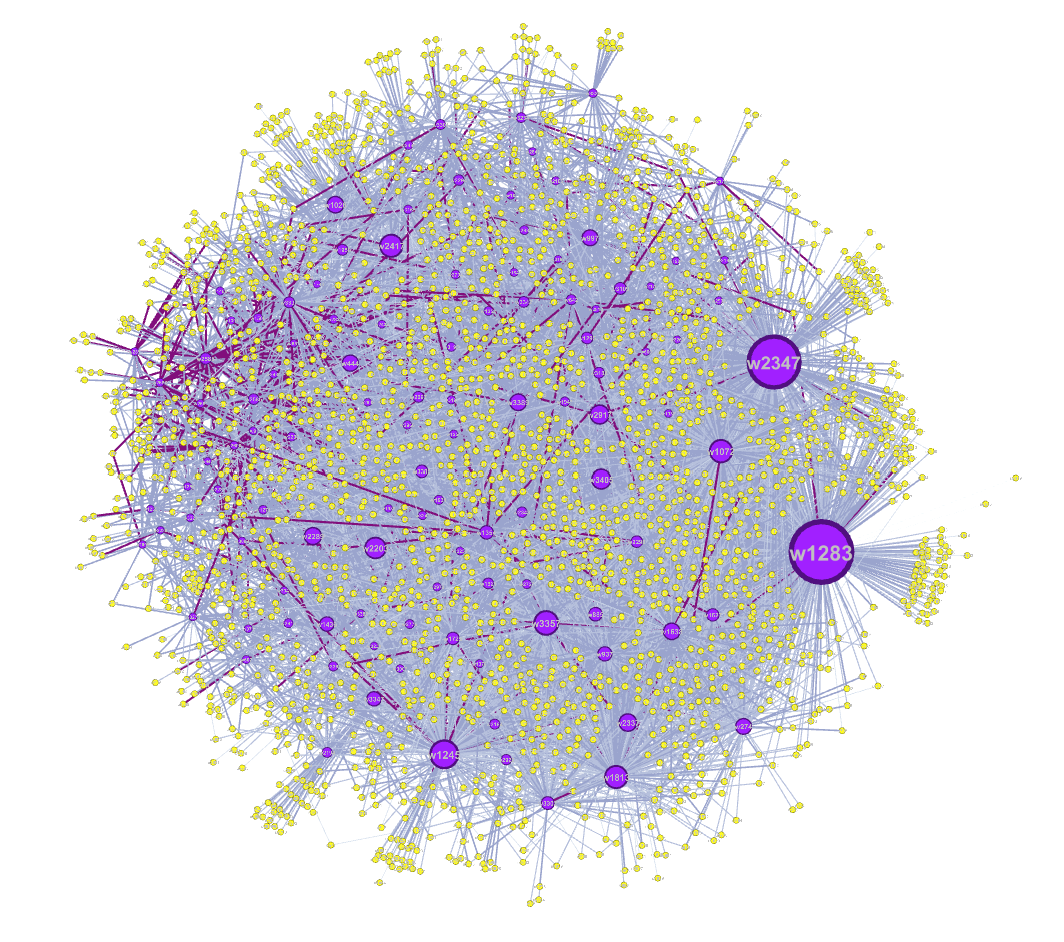

---